<a href="https://colab.research.google.com/github/tmalveirac/fcpc/blob/master/fcpc_analise_projetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise projetos FCPC - Fundação Cearense de Pesequisa e Cultura - CNPJ 05.330.436/0001-62

FCPF é uma Fundação privada - Fundação de Apoio a Universidade Federal do Ceará - UFC

CNAE principal: Atividades de apoio à educação, exceto caixas escolares
CNAEs Secundários: Atividades de rádio

Fonte: RFB

Estatuto FCPC: http://www.fcpc.ufc.br/Content/documentos/estatuto_fcpc_v1.pdf

Estatuto UFC: http://www.ufc.br/images/_files/a_universidade/estatuto_ufc/estatuto_ufc.pdf

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  
plt.rcParams['figure.figsize'] = (20,7)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.float_format = '${:,.2f}'.format
pd.options.display.max_colwidth = 100

In [0]:
#Carregando Dados - Pagamentos pessoa física 2002-2020
df_2020 = pd.read_csv('/content/2020.csv')
df_2020['ano'] = 2020
df_2002_2019 = pd.read_csv('/content/fcpc_despesas_pf_2002_2019.csv')
pf_df = df_2020.append(df_2002_2019)
pf_df['tipo'] = 'PF'

In [0]:
#Tratando o valor
pf_df['valor_limpo'] = pf_df['VALOR (R$)'].str.replace('.', '').str.replace(',', '.')
#Convertendo para Numerico
pf_df['valor_numerico'] = pd.to_numeric(pf_df['valor_limpo'])
pf_df['data_limpa'] = pd.to_datetime(pf_df['DATA']) 
pf_df.describe()

,ano,valor_numerico
count,"$242,299.00","$242,299.00"
mean,"$2,011.44","$1,603.80"
std,$4.92,"$3,088.20"
min,"$2,002.00",$0.00
25%,"$2,007.00",$180.00
50%,"$2,012.00",$622.00
75%,"$2,015.00","$2,000.00"
max,"$2,020.00","$328,428.65"


In [0]:
# Carregando Dados - Pagamentos Pessoa Jurídica
pj_df = pd.read_csv('/content/fcpc_despesas_pj_2010_2019.csv')
pj_df['tipo'] = 'PJ'
pj_df['TIPO DE PAGAMENTO'] = 'NAO INFORMADO'

In [0]:
#Tratando o valor
pj_df['valor_limpo'] = pj_df['VALOR (R$)'].str.replace('.', '').str.replace(',', '.')
#Convertendo para Numerico
pj_df['valor_numerico'] = pd.to_numeric(pj_df['valor_limpo'])
#Tratando a data
pj_df['data_limpa'] = pd.to_datetime(pj_df['DATA']) 
pj_df.describe()

,ano,valor_numerico
count,"$100,155.00","$100,155.00"
mean,"$2,014.82","$3,099.62"
std,$3.14,"$22,853.43"
min,"$2,010.00",$0.00
25%,"$2,012.00",$115.81
50%,"$2,015.00",$422.00
75%,"$2,018.00","$1,395.89"
max,"$2,019.00","$2,608,328.00"


In [0]:
#Tratamento para igualar layout PF e PJ para realizar o append
pj_df = pj_df.rename({'CNPJ': 'CPF_CNPJ'}, axis='columns')
pf_df = pf_df.rename({'CPF': 'CPF_CNPJ'}, axis='columns')
pj_df = pj_df[['tipo', 'CPF_CNPJ', 'NOME', 'TIPO DE PAGAMENTO', 'PROJETO', 'DATA', 'VALOR (R$)', 'ano',
       'valor_limpo', 'valor_numerico', 'data_limpa']]
pf_df = pf_df[['tipo', 'CPF_CNPJ', 'NOME', 'TIPO DE PAGAMENTO', 'PROJETO', 'DATA', 'VALOR (R$)', 'ano',
       'valor_limpo', 'valor_numerico', 'data_limpa']]
df = pf_df.append(pj_df)

## Análise PJ

In [0]:
 #25 PJ que mais receberam pagamentos da FCPC
 total_pj_s = df.query('tipo == "PJ"').groupby(['CPF_CNPJ','NOME'])['valor_numerico'].sum()
 total_pj_s.sort_values(ascending=False).head(25)

CPF_CNPJ            NOME                                         
***.10.485/****-48  CONSTRUTORA PLATO LTDA - ME                     $13,954,579.14
***.11.739/****-04  NAJA TURISMO LTDA                               $13,258,909.60
***.29.979/****-40  INSS - INSTITUTO NACIONAL DO SEGURO SOCIAL      $11,252,708.29
***.05.868/****-07  UNIMED FORTALEZA                                $10,336,962.75
***.69.034/****-56  SODEXO PASS DO BRASIL SERVICOS E COMERCIO S.A    $9,933,293.22
***.05.952/****-82  BIOTEC SOLUCAO AMBIENTAL INDUS                   $8,769,918.11
***.69.034/****-32  SODEXHO PASS DO BRASIL SERVICO                   $5,866,479.99
***.05.467/****-92  ESFERA COMERCIO E SERVICO LTDA                   $5,313,362.84
***.06.246/****-26  JLJ CONSTRUCAO REPRES. LTDA                      $4,717,262.10
***.09.675/****-80  CENTRAL DE NEGOCIOS COM. DE EQ                   $3,484,183.68
***.09.500/****-26  TEBAS CONSTRUCOES E COMERCIO L                   $3,400,463.53
***.03.050/****-23  C

A primeira da lista possui como sócio-administrador: MARIA ILMA MAGALHAES SILVEIRA PINHEIRO LANDIM, citada em denúncia do MPF (http://www.mpf.mp.br/pgr/documentos/denuncia-no-inquerito-3984)


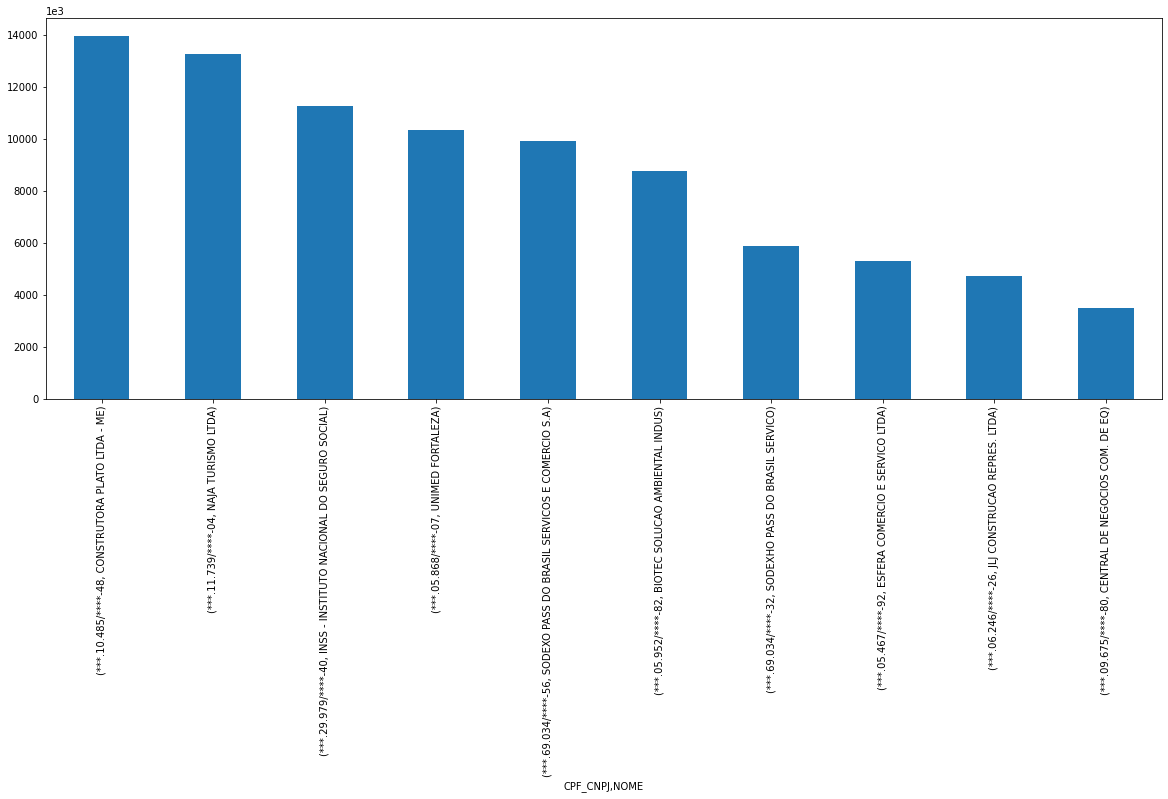

In [0]:
total_pj_s.sort_values(ascending=False).head(10).plot(kind='bar')
plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3)) #Em milhares
plt.show()

## Análise PF

In [0]:
#25 PF que mais receberam pagamentos da FCPC
total_pf_s =  df.query("tipo == 'PF'").groupby(['CPF_CNPJ', 'NOME'])['valor_numerico'].sum()
total_pf_s.sort_values(ascending=False).head(25)

CPF_CNPJ        NOME                               
***.488.873-**  ADRIANO CESAR PRADO CYSNE             $1,624,238.71
***.966.093-**  FAUSTO NILO COSTA JUNIOR              $1,475,056.29
***.374.043-**  DAMIAO CARNEIRO DE ALMEIDA            $1,401,243.11
***.162.073-**  ANTONIO DE BARROS SERRA               $1,366,082.34
***.775.263-**  JAVAM DE CASTRO MACHADO               $1,264,069.05
***.774.083-**  RAQUEL DE MELO ROLIM                  $1,263,226.04
***.096.683-**  MARCELO ARAUJO LIMA                   $1,212,615.61
***.501.533-**  FRANCISCO RODRIGO PORTO CAVALCANTI    $1,190,588.69
***.839.713-**  FRANCISCO EDUARDO ARAUJO SOARES       $1,175,651.56
***.725.698-**  LEONILDO ADAO CHRISTOFOLETTI          $1,151,452.15
***.311.163-**  LUIZ ROBERTO DE OLIVEIRA              $1,075,104.26
***.541.043-**  MARCOS AURELIO FROTA VASCONCELOS      $1,056,103.62
***.174.183-**  FRANCISCO VANILSON PINHEIRO LEITE     $1,050,733.77
***.830.183-**  ROSSANA MARIA DE CASTRO ANDRADE       $1,040,057

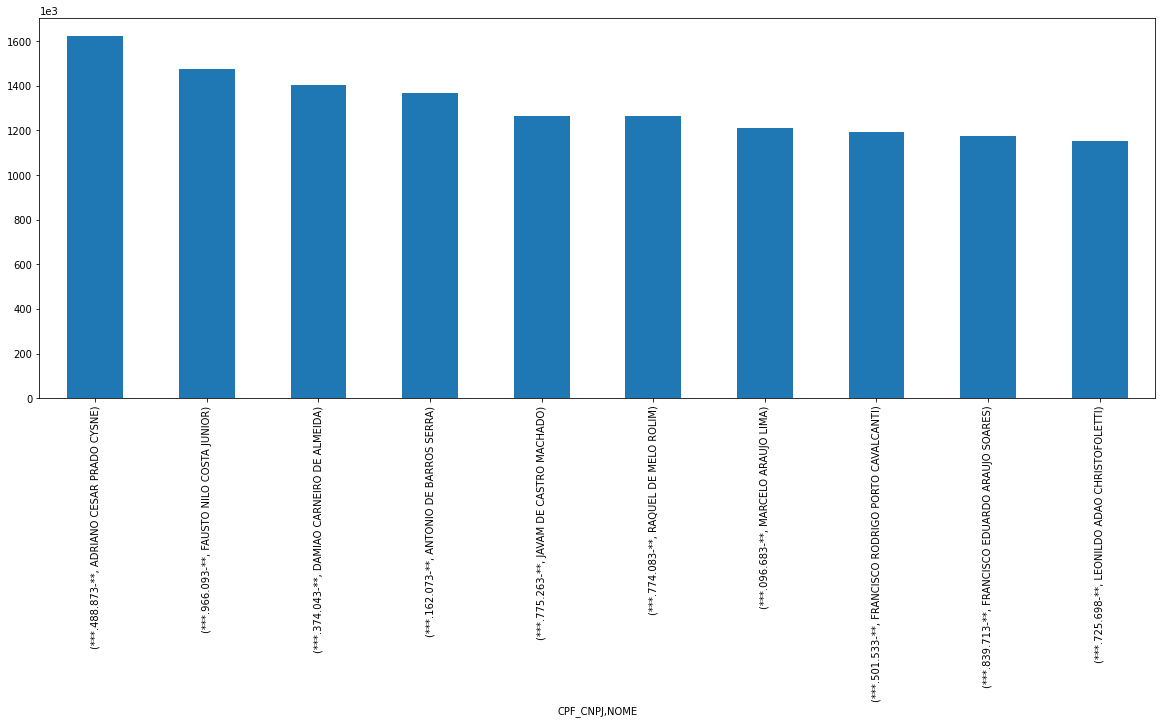

In [0]:
total_pf_s.sort_values(ascending=False).head(10).plot(kind='bar')
plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3)) #Em milhares
plt.show()

## Análise por Projeto

In [0]:
#25 projetos com maior custo da FCPC
total_projeto_s =  df.groupby(['PROJETO'])['valor_numerico'].sum()
total_projeto_s.sort_values(ascending=False).head(25)

PROJETO
0101 - FCPC                                                                           $53,148,187.16
2607 - CT.BNDES/UFC/FCPC - CONSTRUÃ‡ÃƒO DO CPDM                                       $27,089,242.89
1089 - RESCISAO CONTRATUAL                                                            $18,121,744.06
0104 - FCPC - 124.176-1 - ENCARGOS                                                    $14,145,768.86
2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DOS CURSOS DE GRADUACAO DA UAB/UFC 2012   $11,796,084.99
2155 - CV - FUNCAP/FCPC-09/2008 - PROGRAMA PRONEX                                      $9,659,882.70
2209 - CT - UFC/FCPC-INFRA-ESTRUTURA DAS BIBLIOTECAS DE APOIO PRESENCIAL               $9,604,552.65
2102 - CV - BB/UFC/FCPC-APOIO AS ATIVIDADES DA UFC                                     $9,321,327.90
3143 - TC - LG/UFC/FCPC - MOBILE, TOOLS & CAS                                          $8,894,962.49
3253 - TC. LG/UFC/FCPC - MOBILE, TOOLS & CAS                                       

## Análise PMF - Prefeitura de Fortaleza

A PMF contrata a FCPC por dispensa ou por meio de celebração de convênio.

Segundo o Portal da Transparência da Prefeitura de Fortaleza, as seguintes despesas foram realizadas com a fundação:


```
*   2010  R$ 11.798.270,08
*   2011  R$ 3.464.261,97
*   2012  R$ 1.601.679,55
*   2013  R$ 1.127.080,15
*   2014  R$ 4.016.998,66
*   2015  R$ 6.245.564,02
*   2016  R$ 5.407.900,24
*   2017  R$ 279.892,00
*   2018  R$ 4.008.040,58
*   2019  R$ 511.229,57
*   2020  R$ 279.892,00

TOTAL = R$ 38.740.808,82
```

Fonte: https://transparencia.fortaleza.ce.gov.br/
Data: 02/05/2020


Há pagamentos para PJ e PF em projetos envolvendo a PMF e a FCPC. A PMF contrata a FCPC por Dispensa de Licitação, a qual, por sua vez, contrata PFs e PJs para execução dos trabalhos.

Essa hipótese de Dispensa de Licitação está prevista na Lei 8666/93, Art. 24:

```
# XIII - na contratação de instituição brasileira incumbida regimental ou estatutariamente da pesquisa, do ensino ou do desenvolvimento institucional, ou de instituição dedicada à recuperação social do preso, desde que a contratada detenha inquestionável reputação ético-profissional e não tenha fins lucrativos;
```

A Fundação, por sua vez, não é obrigada a licitar, uma vez que não integra a Administração Pública. No âmbito federal, são exigidos apenas a realização de cotação prévia de preços e o respeito aos princípios da impessoalidade, moralidade e economicidade.

Fonte: https://www.conjur.com.br/2017-mai-17/entidade-fins-lucrativos-nao-obrigada-licitacao-agu

Segundo súmula do TCU sobre o assunto:

```
# SÚMULA Nº 250
A contratação de instituição sem fins lucrativos, com dispensa de licitação, com fulcro no art. 24, inciso XIII, da Lei n.º 8.666/93, somente
é admitida nas hipóteses em que houver nexo efetivo entre o mencionado dispositivo, a natureza da instituição e o objeto contratado,
além de comprovada a compatibilidade com os preços de mercado. 
```
Fonte: https://portal.tcu.gov.br/lumis/portal/file/fileDownload.jsp?fileId=8A8182A25753C20F0157679AA5617071&inline=1


Há processo em curso no TCE-CE questionando contratação do IPLANFOR com a FCPC:

Processo: PROCESSO: 35581/2018-8 - Prestação de Contas - Exercício 2014

Fonte: blob:https://www.tce.ce.gov.br/4c2a20b8-c187-4331-8497-69f39c918293

In [0]:
total_projeto_df = total_projeto_s.to_frame();
total_projeto_df = total_projeto_df.reset_index()
total_projeto_df.query("PROJETO.str.contains('PMF|IPLANFOR|HABITAFOR|SECULTFOR|SDE|SECRETARIA ESPORTE', case=False)", engine='python').sort_values('valor_numerico', ascending=False)
#Há dificuldades para determinar quais os projetos da PMF. Busca em string.

,PROJETO,valor_numerico
1715,3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO FORTALEZA 2040,"$6,560,381.11"
1713,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO FORTALEZA 2040,"$3,115,891.68"
933,2427 - CV - HABITAFOR/FCPC - 01/2010,"$3,088,039.33"
696,2228 - CV - PMF/FCPC - HABITAFOR,"$2,428,915.55"
2047,3399 - CT.IPLANFOR/FCPC - FORTALEZA 2040 - PLANOS ESPECIFICOS,"$2,330,833.54"
1063,2548 - CV - HABITAFOR 03/2010-PLANEJAMENTO E VIABILIZACAO DE PROJETOS,"$2,302,924.71"
442,1645 - CV - FCPC/HABITAFOR-F.HABIT.DE FORTALEZA,"$1,707,058.78"
697,2228 - CV - PMF/FCPC - HABITAFOR,"$862,835.80"
2012,3365 - CT. IPLANFOR/FCPC - FORTALEZA 2040 - FASE 2,"$761,304.13"
580,2053 - CV - SECRETARIA ESPORTE/FCPC - VILAS OLIMPICAS CONJ.CEARA/GENIBAU,"$674,860.99"


## Análise IPLANFOR

In [0]:
#Total pago de projetos do IPLANFOR para PF e PJ
df.dropna(subset=['PROJETO']).query("PROJETO.str.contains('IPLANFOR', case=False)", engine='python').groupby('tipo')['valor_numerico'].sum()

tipo
PF   $11,851,091.85
PJ    $1,013,779.09
Name: valor_numerico, dtype: float64

In [0]:
total_cpf_cnpj_iplanfor_s =  df.dropna(subset=['PROJETO']).query("PROJETO.str.contains('IPLANFOR', case=False)", engine='python').groupby(['tipo','CPF_CNPJ', 'NOME'])['valor_numerico'].sum()
total_cpf_cnpj_iplanfor_s.sort_values(ascending=False).head(20)


tipo  CPF_CNPJ            NOME                                  
PF    ***.966.093-**      FAUSTO NILO COSTA JUNIOR                 $1,474,256.29
      ***.839.713-**      FRANCISCO EDUARDO ARAUJO SOARES          $1,175,651.56
      ***.468.963-**      FRANCISCO SULIANO MESQUITA DE PAULA        $983,810.48
      ***.457.143-**      DELBERG PONCE DE LEON                      $611,420.88
      ***.285.893-**      PEDRO ESDRAS FIGUEIREDO GUIMARAES          $486,069.04
      ***.254.288-**      ALEXANDER DE SOUZA LARANJEIRA              $467,384.42
      ***.332.674-**      SERGIO JOSE CALVALCANTI BUARQUE            $457,303.92
      ***.140.963-**      FRANCISCO QUEIROZ D. NETO                  $363,124.86
      ***.010.743-**      BRUNO BARROS LEAL DE CARVALHO FERREIRA     $356,292.76
      ***.821.003-**      RODRIGO PONCE DE LEON                      $323,897.48
      ***.660.063-**      FERGUS ARAUJO GALAS                        $285,171.00
      ***.823.803-**      MARINA PARENTE COS

Observa-se que os pagamentos dos projetos IPLANFOR se destacam por seus valores expressivos. 

Por exemplo, a quantia recebida por FAUSTO NILO COSTA JUNIOR nos projetos IPLANFOR o colocam em 2º do ranking total da história das despesas da FCPC. 

Da mesma forma, a quantia recebida por FRANCISCO EDUARDO ARAUJO SOARES nos projetos IPLANFOR o colocam no top 10 dos maiores pagamentos da história da FCPC.